In [37]:
%pip install shimmy

Note: you may need to restart the kernel to use updated packages.


## Step 1: Environment Setup ##

In [1]:
import torch
import numpy as np
import os #NEW LINE
import gymnasium as gym 
from stable_baselines3 import PPO, DQN, A2C, SAC
from stable_baselines3.common.evaluation import evaluate_policy
from tensorflow.python.client import device_lib
from IPython.display import display, clear_output


In [39]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13387546299643504234
xla_global_id: -1
]


### Custom VRP Envirnment ###

In [40]:
# Shows us a list of publically registered environments

from gym import envs
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs]
for id in env_ids:
    print(id)

CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
LunarLander-v2
LunarLanderContinuous-v2
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v0
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v0
Taxi-v3
Reacher-v2
Pusher-v2
Thrower-v2
Striker-v2
InvertedPendulum-v2
InvertedDoublePendulum-v2
HalfCheetah-v2
HalfCheetah-v3
Hopper-v2
Hopper-v3
Swimmer-v2
Swimmer-v3
Walker2d-v2
Walker2d-v3
Ant-v2
Ant-v3
Humanoid-v2
Humanoid-v3
HumanoidStandup-v2
FetchSlide-v1
FetchPickAndPlace-v1
FetchReach-v1
FetchPush-v1
HandReach-v0
HandManipulateBlockRotateZ-v0
HandManipulateBlockRotateZTouchSensors-v0
HandManipulateBlockRotateZTouchSensors-v1
HandManipulateBlockRotateParallel-v0
HandManipulateBlockRotateParallelTouchSensors-v0
HandManipulateBlockRotateParallelTouchSensors-v1
HandManipulateBlockRotateXYZ-v0
HandManipulateBlockRotateXYZTouchSensors-v0
HandManipulateBlockRotateXYZTouchSensors-v1
HandManipulateBlockFull-v0
HandManipulateBlock-v0
HandManipulate

In [41]:
from gym_vrp.envs import IRPEnv
from agents import IRPAgent

# Init the custom environment
environment_name = "Capacitated-VRP-Environment"
env = IRPEnv(num_nodes=9, batch_size=6, num_draw=3)

# IRP ENV Functions:

# __init__
# step()
# get_state()
# generate_mask()
# generate_graphs()
# reset()

### Testing our environment ###

In [42]:
import time
import random
import numpy as np

episodes = 3
actions = np.ndarray([]) # np.array(sequence)
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        actions = env.current_location
        n_state, reward, terminated, truncated= env.step(actions)
        score+=reward
        done = truncated or terminated
    env.render()
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

print("The action space is: {}".format(env.action_space)) # generate mask
print("The observation space is: {}".format(env.observation_space)) #generate_graphs() or get_state()
print("Sample observation space value: {}".format(env.observation_space.sample())) #sampler.get_graph_positions()

In [ ]:
'''
env = IRPEnv(num_nodes=459, batch_size=6, num_draw=3)

print("The action space is: {}".format(env.action_space)) # generate mask
print("The observation space is: {}".format(env.observation_space)) #generate_graphs() or get_state()
print("Sample observation space value: {}".format(env.observation_space.sample())) #sampler.get_graph_positions()
'''

## Start of Agent Evaluation ##

### Setting up File paths for saved models and logs ###

In [2]:
from gym_vrp.envs import IRPEnv
from agents import IRPAgent
from stable_baselines3.common.vec_env import DummyVecEnv
import os
import tensorflow as tf
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

env = IRPEnv(num_nodes=459, batch_size=6, num_draw=3)
#env = DummyVecEnv([lambda: env])
log_path = os.path.join('Training', 'Logs')
save_path = os.path.join('Training', 'Saved Models')
# sess.graph contains the graph definition; that enables the Graph Visualizer.
file_writer = tf.summary.create_file_writer(log_path)

stop_callback = StopTrainingOnRewardThreshold(reward_threshold=190, verbose=1)
#eval_callback = EvalCallback(env, callback_on_new_best=stop_callback, eval_freq=10000, best_model_save_path=save_path, verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_path, histogram_freq=1)

In [3]:
!tensorboard --logdir={training_log_path}

^C


#### Custom Agent ####

INFO:root:Start Training
INFO:root:Update Baseline
INFO:root:Epoch 0 finished - Loss: 18011.091796875, Advantage: -7.942817687988281 Dist: -248.20660400390625


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 1 finished - Loss: -5391.52734375, Advantage: 2.6824417114257812 Dist: -255.782470703125
INFO:root:Update Baseline
INFO:root:Epoch 2 finished - Loss: -56517.81640625, Advantage: 25.716964721679688 Dist: -277.4906005859375
INFO:root:Update Baseline
INFO:root:Epoch 3 finished - Loss: -42781.70703125, Advantage: 19.57545280456543 Dist: -271.32196044921875


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 4 finished - Loss: -80838.71875, Advantage: 36.226322174072266 Dist: -283.2382507324219
INFO:root:Update Baseline
INFO:root:Epoch 5 finished - Loss: -59897.94140625, Advantage: 27.279205322265625 Dist: -279.37115478515625
INFO:root:Update Baseline
INFO:root:Epoch 6 finished - Loss: -60745.42578125, Advantage: 28.096315383911133 Dist: -279.7378845214844
INFO:root:Update Baseline
INFO:root:Epoch 7 finished - Loss: -70433.6015625, Advantage: 33.32731246948242 Dist: -284.1798400878906
INFO:root:Update Baseline
INFO:root:Epoch 8 finished - Loss: -66360.6640625, Advantage: 31.440183639526367 Dist: -284.84716796875
INFO:root:Update Baseline
INFO:root:Epoch 9 finished - Loss: -72333.34375, Advantage: 34.73221206665039 Dist: -290.5818786621094
INFO:root:Update Baseline
INFO:root:Epoch 10 finished - Loss: -91269.0390625, Advantage: 42.91891860961914 Dist: -291.1975402832031
INFO:root:Update Baseline
INFO:root:Epoch 11 finished - Loss: -119142.125, Advant

replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 44 finished - Loss: 27612.640625, Advantage: -16.818763732910156 Dist: -368.1397705078125


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 45 finished - Loss: 20947.732421875, Advantage: -11.474937438964844 Dist: -322.3164978027344
INFO:root:Update Baseline
INFO:root:Epoch 46 finished - Loss: 77045.2578125, Advantage: -42.33365249633789 Dist: -311.3358459472656


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 47 finished - Loss: -1289.71875, Advantage: -0.7585957646369934 Dist: -317.96636962890625


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 48 finished - Loss: 22590.982421875, Advantage: -13.275769233703613 Dist: -313.036865234375


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 49 finished - Loss: -3277.487060546875, Advantage: 0.4084116518497467 Dist: -318.24432373046875


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 50 finished - Loss: -5794.50927734375, Advantage: 1.939056396484375 Dist: -305.8164978027344


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 51 finished - Loss: -1958.2734375, Advantage: -0.1333211213350296 Dist: -310.5887145996094
INFO:root:Update Baseline
INFO:root:Epoch 52 finished - Loss: 4534.1318359375, Advantage: -3.465972900390625 Dist: -291.2409973144531
INFO:root:Update Baseline
INFO:root:Epoch 53 finished - Loss: -4769.41064453125, Advantage: 1.743115782737732 Dist: -313.9570617675781


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 54 finished - Loss: -10795.1435546875, Advantage: 6.105814456939697 Dist: -324.5050964355469
INFO:root:Update Baseline
INFO:root:Epoch 55 finished - Loss: 10877.8232421875, Advantage: -6.060638427734375 Dist: -311.74700927734375
INFO:root:Update Baseline
INFO:root:Epoch 56 finished - Loss: 33852.23046875, Advantage: -18.78704261779785 Dist: -319.3622131347656


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 57 finished - Loss: -10767.8291015625, Advantage: 5.574254512786865 Dist: -349.4837646484375


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 58 finished - Loss: -18287.83984375, Advantage: 7.8848876953125 Dist: -330.75927734375
INFO:root:Update Baseline
INFO:root:Epoch 59 finished - Loss: 2834.84765625, Advantage: -1.4180704355239868 Dist: -302.3757629394531
INFO:root:Update Baseline
INFO:root:Epoch 60 finished - Loss: -34441.63671875, Advantage: 17.28850746154785 Dist: -340.7270812988281


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 61 finished - Loss: 19591.021484375, Advantage: -10.54486083984375 Dist: -305.0684509277344


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 62 finished - Loss: 1844.4195556640625, Advantage: -2.0498504638671875 Dist: -313.9466857910156
INFO:root:Update Baseline
INFO:root:Epoch 63 finished - Loss: 26284.287109375, Advantage: -14.153477668762207 Dist: -324.4374084472656
INFO:root:Update Baseline
INFO:root:Epoch 64 finished - Loss: 29929.193359375, Advantage: -15.756373405456543 Dist: -295.3032531738281


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 65 finished - Loss: 39390.23828125, Advantage: -21.34078025817871 Dist: -329.3846740722656


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 66 finished - Loss: 21732.001953125, Advantage: -11.313075065612793 Dist: -317.44378662109375
INFO:root:Update Baseline
INFO:root:Epoch 67 finished - Loss: 10962.1240234375, Advantage: -6.052449703216553 Dist: -324.38861083984375
INFO:root:Update Baseline
INFO:root:Epoch 68 finished - Loss: 4336.6689453125, Advantage: -2.3263397216796875 Dist: -311.0917053222656
INFO:root:Update Baseline
INFO:root:Epoch 69 finished - Loss: -7758.93115234375, Advantage: 4.429677486419678 Dist: -320.3680725097656
INFO:root:Update Baseline
INFO:root:Epoch 70 finished - Loss: -14895.5, Advantage: 7.19580078125 Dist: -334.0930480957031
INFO:root:Update Baseline
INFO:root:Epoch 71 finished - Loss: 4748.494140625, Advantage: -2.1703898906707764 Dist: -321.0869445800781
INFO:root:Update Baseline
INFO:root:Epoch 72 finished - Loss: 1244.5054931640625, Advantage: -0.408905029296875 Dist: -311.3735656738281
INFO:root:Update Baseline
INFO:root:Epoch 73 finished - Loss: -39

replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 82 finished - Loss: 9530.2255859375, Advantage: -4.836080074310303 Dist: -335.5746154785156
INFO:root:Update Baseline
INFO:root:Epoch 83 finished - Loss: -6974.64404296875, Advantage: 3.644892454147339 Dist: -336.3360900878906


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 84 finished - Loss: -7807.86083984375, Advantage: 3.9965007305145264 Dist: -338.9866027832031
INFO:root:Update Baseline
INFO:root:Epoch 85 finished - Loss: -8061.05224609375, Advantage: 4.314112186431885 Dist: -319.8994445800781
INFO:root:Update Baseline
INFO:root:Epoch 86 finished - Loss: -11771.6025390625, Advantage: 6.163304805755615 Dist: -319.9377136230469
INFO:root:Update Baseline
INFO:root:Epoch 87 finished - Loss: -8082.20458984375, Advantage: 4.2134246826171875 Dist: -330.0186462402344
INFO:root:Update Baseline
INFO:root:Epoch 88 finished - Loss: 6879.41162109375, Advantage: -3.564000368118286 Dist: -342.9384765625
INFO:root:Update Baseline
INFO:root:Epoch 89 finished - Loss: -16813.822265625, Advantage: 8.626378059387207 Dist: -355.6332702636719
INFO:root:Update Baseline
INFO:root:Epoch 90 finished - Loss: -4513.91943359375, Advantage: 2.3983967304229736 Dist: -336.2570495605469
INFO:root:Update Baseline
INFO:root:Epoch 91 finished - 

<Figure size 640x480 with 0 Axes>

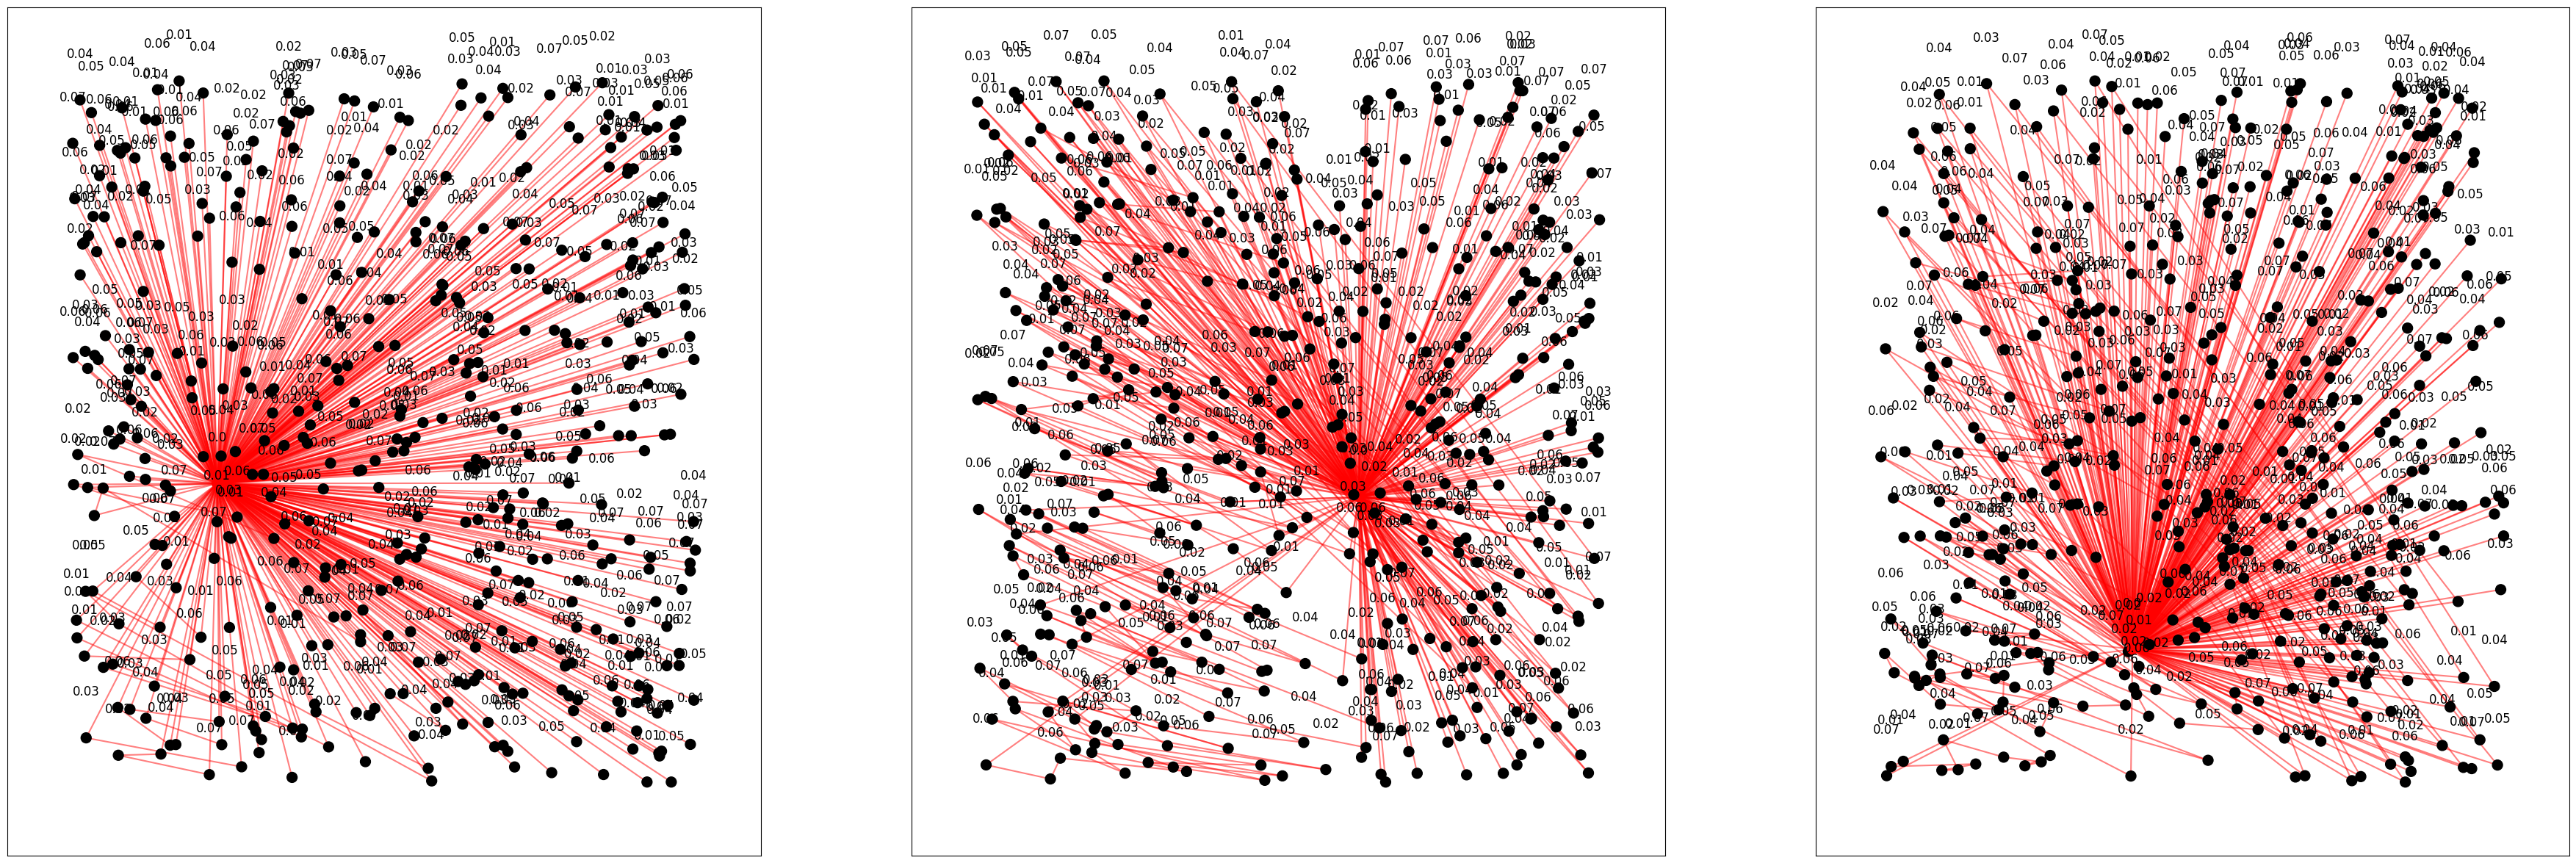

NameError: name 'time' is not defined

In [4]:
# Init the agent
agent = IRPAgent() #uses atom optimizer but maybo out of scope?
# Start training
agent.train(env)
for i in range(99):
    env.render()
    time.sleep(0.01)

In [ ]:
#Defines the root log path
log_path = 'train_logs'
#Reinterprets the env
env = DummyVecEnv([lambda: env])

#### PPO Agent ####

In [ ]:
#Defines the PPO 'agent'
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

#### PPO Training ####

In [ ]:
timesteps = 10000
start = time.time()
#Re-running this training will accumulate
model.learn(total_timesteps=timesteps, callback=eval_callback)
stop = time.time()
print("PPO: Total Training time for {} timesteps : {}s".format(timesteps, stop-start))

##### PPO Model Saving #####

In [ ]:
PPO_path = os.path.join(save_path, 'PPO_Model_VRP')
model.save(PPO_path)

##### PPO Model Evaluation #####

In [ ]:
evaluate_policy(model, env, n_eval_episodes=12, render=True)
env.close()

In [ ]:
# RUN TO TROUBLESHOOT 'display Quit' error
del model

In [ ]:
# Model 1 Test
model = PPO.load(PPO_path, env=env)
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done: 
        print('info', info)
        break
env.close()

#### A2C Agent ####

In [ ]:
#Defines the PPO 'agent'
model = A2C('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

#### A2C Training ####

In [ ]:
#Re-running this training will accumulate
timesteps = 20000
start = time.time()
model.learn(total_timesteps=timesteps, callback=eval_callback)
stop = time.time()
print("A2C: Total Training time for {} timesteps : {}s".format(timesteps, stop-start))

#### A2C Model Saving ####

In [ ]:
A2C_path = os.path.join(save_path, 'A2C_Model_VRP')
model.save(A2C_path)

#### A2C Model Evaluation ####

In [ ]:
evaluate_policy(model, env, n_eval_episodes=12, render=True)
env.close()

In [ ]:
del model

In [ ]:
# Model 2 Test
model = A2C.load(A2C_path, env=env)
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done: 
        print('info', info)
        break
env.close()